# 10.10 Applied Exercises

In [1]:
! pip install ISLP

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nv

In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import train_test_split, GridSearchCV
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset


## Question - 6. Consider the simple function $R(β) = sin(β) + β/10$.

### (a) Draw a graph of this function over the range $β ∈ [−6, 6]$.

Text(0.5, 1.0, 'Graph of R(Beta)')

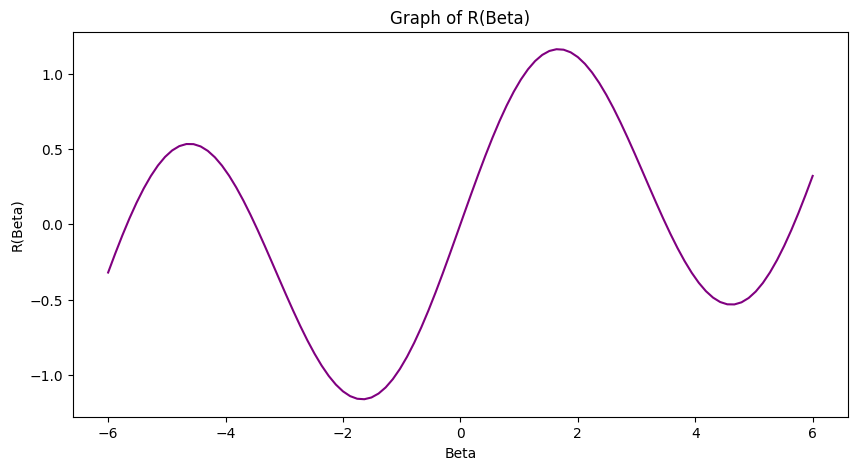

In [6]:
plt.figure(figsize = (10,5))
beta = np.linspace(-6,6,100)
plt.plot(beta, np.sin(beta) + beta/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)')
plt.title('Graph of R(Beta)')


### (b) What is the derivative of this function?

Text(0.5, 1.0, 'Graph of R(Beta)`')

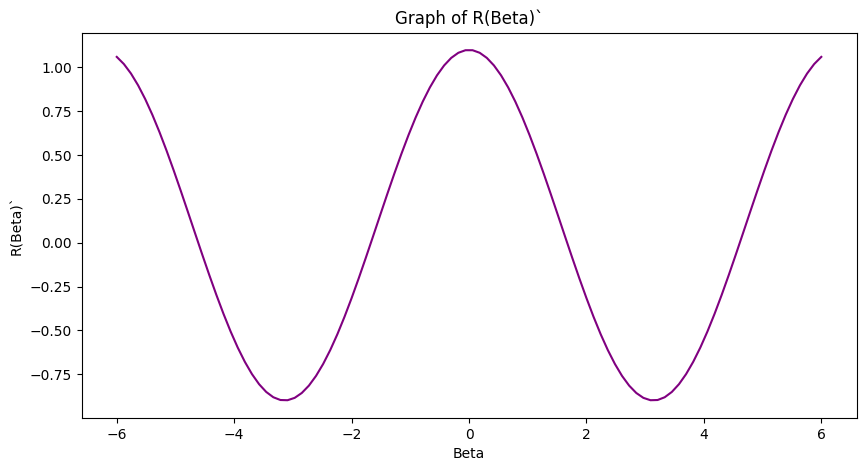

In [65]:
derv = np.cos(beta) + 1/10
plt.figure(figsize = (10,5))
beta = np.linspace(-6, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

### (c) Given $β0 = 2.3$, run gradient descent to find a local minimum of $R(β)$ using a learning rate of $ρ = 0.1$. Show each of $β0, β1,...$ in your plot, as well as the final answer.

In [121]:
from sklearn.linear_model import SGDRegressor
beta = np.linspace(2.3, 6, 100)
sgd = SGDRegressor(learning_rate = 'constant', eta0 = 0.1, fit_intercept= False)
sgd.fit(beta.reshape(-1,1), np.sin(beta) + beta/10)

SGDRegressor(eta0=0.1, fit_intercept=False, learning_rate='constant')

In [122]:
sgd.coef_


array([0.34792677])

Text(0.5, 1.0, 'Graph of R(Beta)`')

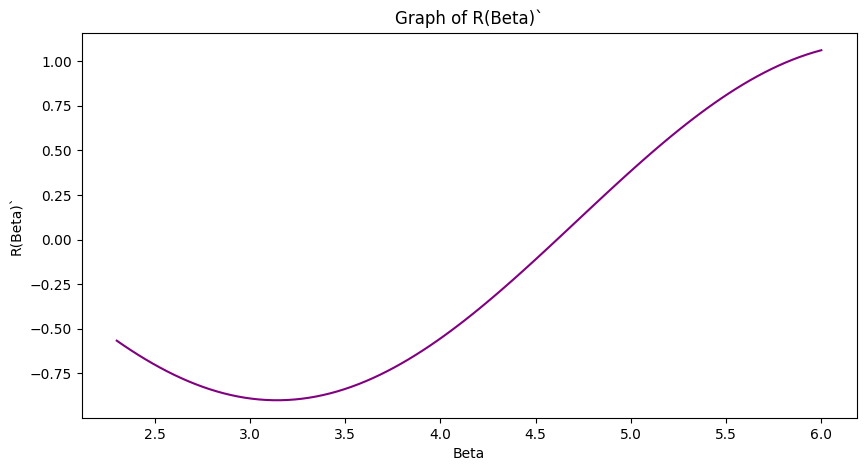

In [62]:
plt.figure(figsize = (10,5))
beta = np.linspace(2.3, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

In [129]:
def derivative(arr):
    output= np.cos(arr)+0.1
    return output

def gradient_descent(x_start,rate,max_iters = 10000,precision = 0.000001):
    abs_error=1
    cur_x = x_start
    iters=0
    x,y = [],[]
    while abs_error > precision and iters < max_iters:
        prev_x = cur_x
        x.append(cur_x)
        y.append(derivative(cur_x))
        cur_x = cur_x - rate * derivative(cur_x) #Grad descent
        abs_error = abs(cur_x - prev_x) #Change in x
        iters = iters+1 #iteration count


    print("The local minimum occurs at", cur_x)
    plt.figure(figsize = (10,5))
    plt.plot(x,y, color = 'purple')
    plt.xlabel('Beta value')
    plt.ylabel('Derivative(Beta)')
    plt.title('Beta vs Derivative(Beta)')
    return cur_x

The local minimum occurs at 4.612212584046047


4.612212584046047

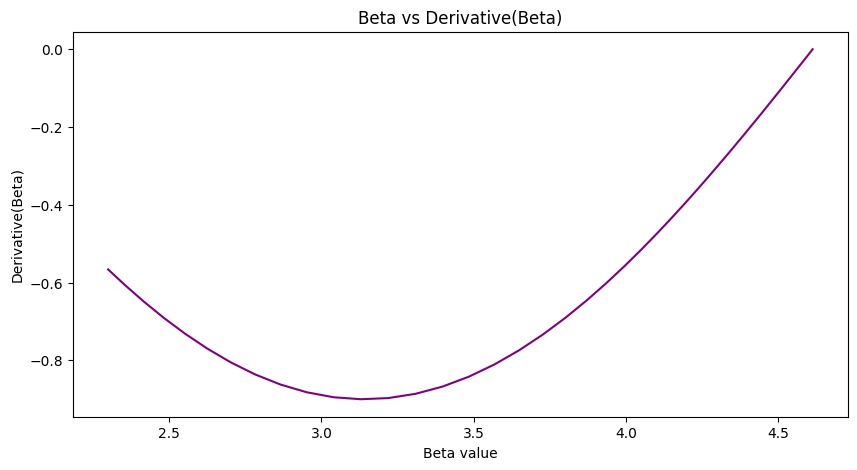

In [130]:
gradient_descent(x_start=2.3,rate=0.1)

###(d) Repeat with β0 = 1.4.

In [110]:
beta = np.linspace(1.4, 6, 100)
sgd = SGDRegressor(learning_rate = 'constant', eta0 = 0.1, fit_intercept= False)
sgd.fit(beta.reshape(-1,1),np.sin(beta) + beta/10)

SGDRegressor(eta0=0.1, fit_intercept=False, learning_rate='constant')

In [111]:
sgd.coef_

array([0.69983437])

Text(0.5, 1.0, 'Graph of R(Beta)`')

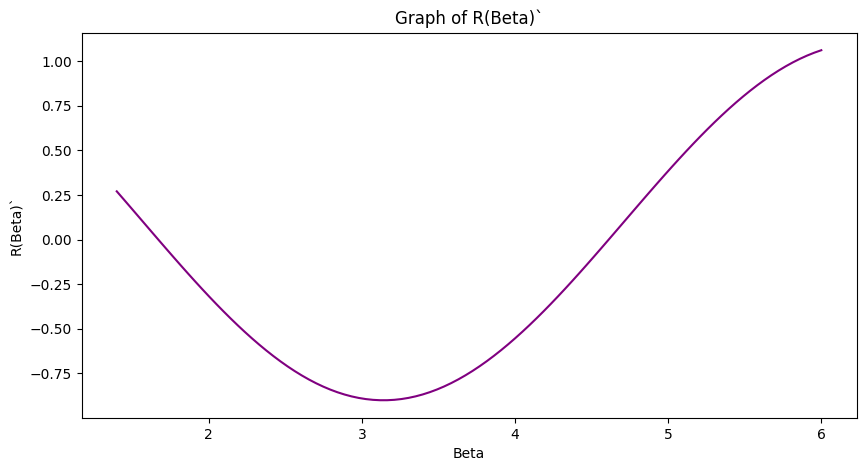

In [112]:
plt.figure(figsize = (10,5))
beta = np.linspace(1.4, 6, 100)
plt.plot(beta, np.cos(beta) + 1/10, color = 'purple')
plt.xlabel('Beta')
plt.ylabel('R(Beta)`')
plt.title('Graph of R(Beta)`')

The local minimum occurs at -1.670955163656141


-1.670955163656141

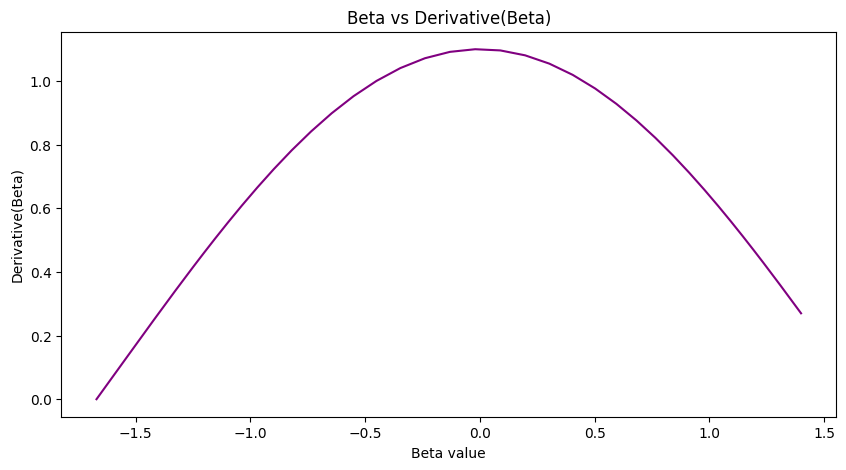

In [131]:
gradient_descent(x_start=1.4,rate=0.1)

## 7. Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1– 10.9.2 for guidance. Compare the classifcation performance of your model with that of linear logistic regression.